# Jastrow Factor Derivatives

This notebook calculates the expressions for the derivatives of the following Jastrow function:

$$J(X) = \prod_{i < j} \exp\left(-\frac{\beta^2}{2}r_{ij}^2 + |\beta\gamma|r_{ij}\right)$$

with $N$ particles in $D$ dimensions, $\mathbf{X}\in\mathbb{R}^{N\times D}$ and $r_{ij} = ||\mathbf{X_i} - \mathbf{X_j}||$.

In [1]:
%reload_ext blackcellmagic
from sympy import *
init_printing()

In [2]:
N, D, i, j, k, l, d = symbols("N D i j k l d", integer=True)
X = IndexedBase("X", shape=(N, D))


## Definition


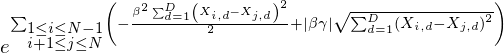

In [3]:
def r(i, j):
    return sqrt(Sum((X[i, d] - X[j, d]) ** 2, (d, 1, D)))


# r = Function('r', positive=True)


def J(X):
    beta, gamma = symbols(r"\beta \gamma", real=True)
    exponent = Sum(
        -beta ** 2 / 2 * r(i, j) ** 2 + Abs(beta * gamma) * r(i, j),
        (i, 1, N - 1),
        (j, i + 1, N),
    )
    return exp(exponent), (beta, gamma)


Jastrow, (beta, gamma) = J(X)
Jastrow


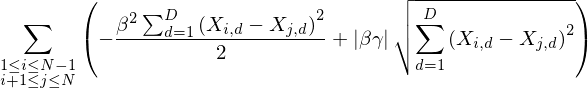

In [4]:
log_Jastrow = expand_log(log(Jastrow), force=True)
log_Jastrow


## Derivative w.r.t. $\gamma$


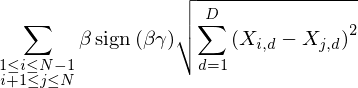

In [5]:
dlogJ_dGamma = diff(log_Jastrow, gamma, 1)
dlogJ_dGamma


## Derivative w.r.t. $\beta$


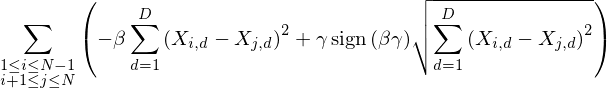

In [6]:
dlogJ_dBeta = diff(log_Jastrow, beta, 1)
dlogJ_dBeta


## Derivative w.r.t. $X_{kl}$


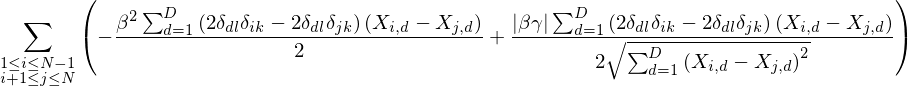

In [7]:
dlogJ_dXkl = diff(log_Jastrow, X[k, l], 1)
dlogJ_dXkl


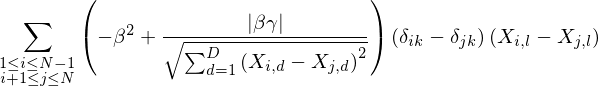

In [8]:
# Manually simplify the above:
dlogJ_dXkl = Sum(
    (KroneckerDelta(k, i) - KroneckerDelta(k, j))
    * (X[i, l] - X[j, l])
    * (-beta ** 2 + Abs(beta * gamma) / r(i, j)),
    (i, 1, N - 1),
    (j, i + 1, N),
)
dlogJ_dXkl


## Second derivative w.r.t. $X_{kl}$


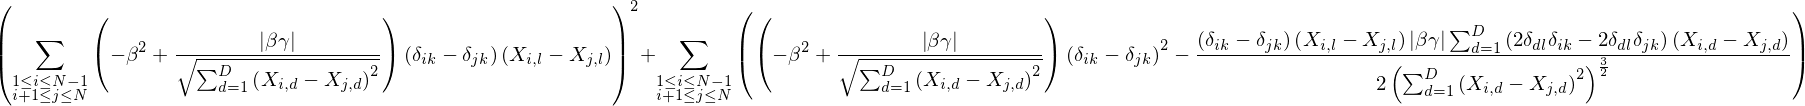

In [12]:
d2J_dXkl2 = dlogJ_dXkl ** 2 + diff(dlogJ_dXkl, X[k, l], 1)
d2J_dXkl2


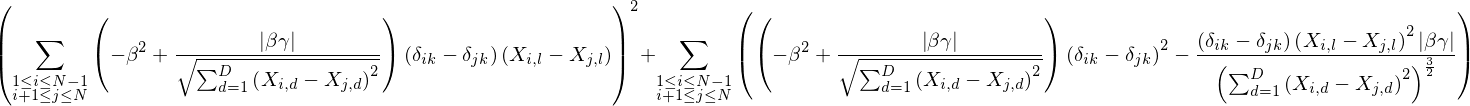

In [13]:
# Manually simplify the above:
d2J_dXkl2 = dlogJ_dXkl ** 2 + Sum(
    (KroneckerDelta(k, i) - KroneckerDelta(k, j)) ** 2
    * (-beta ** 2 + Abs(beta * gamma) / r(i, j))
    - (KroneckerDelta(k, i) - KroneckerDelta(k, j))
    * (X[i, l] - X[j, l]) ** 2
    * Abs(beta * gamma)
    / r(i, j) ** 3,
    (i, 1, N - 1),
    (j, i + 1, N),
)
d2J_dXkl2
